In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

%matplotlib inline

pd.set_option("display.max_columns", None)

## Streaming Service Recommender Model

#### Goals

- Create a streaming service recommender model based on similarity using eucledian distance

### 1. Import data

We will start by joining a survey filled out picking all of Netflix options and then we will use Amazon and HBO after creating a function for more testing.

In [2]:
genres_recommender = pd.read_pickle("../Data/genres_recommender.pkl")

In [3]:
genres_recommender

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
streaming_service,,,,,,,,,,,,,,,,,,,,,,,,,,
Amazon,0.1212,0.1228,0.1619,0.0191,0.2432,0.1252,0.2018,0.3349,0.1045,0.0574,0.0152,0.0606,0.0263,0.0096,0.0032,0.0582,0.0048,0.1021,0.0550,0.0327,0.0144,0.0152,0.0072,0.0287,0.0112,0.0199
HBO,0.0769,0.0533,0.0473,0.0355,0.3905,0.1538,0.1006,0.5089,0.0414,0.0473,0.0059,0.0769,0.0118,0.0237,0.0059,0.0828,0.0296,0.0237,0.0769,0.0237,0.0000,0.0533,0.0414,0.0355,0.0059,0.0000
Netflix,0.1399,0.1190,0.1675,0.0221,0.2736,0.1466,0.1718,0.3767,0.0620,0.0571,0.0123,0.0387,0.0344,0.0178,0.0061,0.0571,0.0018,0.0883,0.0785,0.0344,0.0025,0.0160,0.0110,0.0479,0.0098,0.0031


In [4]:
user_netflix_recommender = pd.read_pickle("../Data/netflix_test.pkl")

### 2. Join data frames

In [5]:
user_netflix = genres_recommender.append(user_netflix_recommender)

In [6]:
user_netflix

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
Amazon,0.1212,0.1228,0.1619,0.0191,0.2432,0.1252,0.2018,0.3349,0.1045,0.0574,0.0152,0.0606,0.0263,0.0096,0.0032,0.0582,0.0048,0.1021,0.0550,0.0327,0.0144,0.0152,0.0072,0.0287,0.0112,0.0199
HBO,0.0769,0.0533,0.0473,0.0355,0.3905,0.1538,0.1006,0.5089,0.0414,0.0473,0.0059,0.0769,0.0118,0.0237,0.0059,0.0828,0.0296,0.0237,0.0769,0.0237,0.0000,0.0533,0.0414,0.0355,0.0059,0.0000
Netflix,0.1399,0.1190,0.1675,0.0221,0.2736,0.1466,0.1718,0.3767,0.0620,0.0571,0.0123,0.0387,0.0344,0.0178,0.0061,0.0571,0.0018,0.0883,0.0785,0.0344,0.0025,0.0160,0.0110,0.0479,0.0098,0.0031
User,0.1333,0.1333,0.1333,0.0333,0.3333,0.1000,0.1333,0.5000,0.0333,0.1667,0.0333,0.0667,0.2333,0.0333,0.0333,0.0333,0.0333,0.0667,0.1000,0.1000,0.0333,0.0333,0.0333,0.1667,0.0333,0.0333


### 3. Get Similarities

We will use spatial distance from scipy to calculate the distances from the User to each streaming service using the euclidean metric. The one with smaller distance is the one closest (or more similar) to the user.

In [7]:
distances = squareform(pdist(user_netflix, 'euclidean'))

distances

array([[0.        , 0.31512858, 0.09184111, 0.36605291],
       [0.31512858, 0.        , 0.26451248, 0.34741092],
       [0.09184111, 0.26451248, 0.        , 0.32043701],
       [0.36605291, 0.34741092, 0.32043701, 0.        ]])

This function returns the distances between every streaming service and the User, for better understanding, we will convert this to a data frame.

In [8]:
distances_df = pd.DataFrame((squareform(pdist(user_netflix, 'euclidean'))), 
                         index=user_netflix.index, columns=user_netflix.index)

distances_df

,Amazon,HBO,Netflix,User
Amazon,0.000000,0.315129,0.091841,0.366053
HBO,0.315129,0.000000,0.264512,0.347411
Netflix,0.091841,0.264512,0.000000,0.320437
User,0.366053,0.347411,0.320437,0.000000


From the data frame above we can see the the shortest distance is between the User and Netflix, we would take a better look with a heatmap. In the following heatmap, the darker colors represent shorter distance, as shown on the color scale.

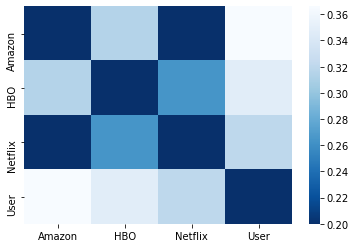

In [9]:
sns.heatmap(distances_df, cmap="Blues_r", vmin=0.2)

Now, we will access the streaming service with the shortest distance.

In [10]:
# we will sort values in ascending order for the User column and remove the first one, since the first value will be
# himself, and we are going to look at the first element on the list, which should be Netflix.

similarities = distances_df['User'].sort_values()[1:]
similarities.index[0]

'Netflix'

Great, it worked for the first test, we will now define a function in order to test Amazon and HBO's surveys.

### 4. Define Function

In [11]:
# this function will need the genres_recommender data frame, the user survey data frame and the number of recommendations
# you will like to have

def get_streaming_recommendation(genres_recommender, user_survey):
    
    recommendations = []
    
    user_recommender = genres_recommender.append(user_survey)
           
    distances_df = pd.DataFrame((squareform(pdist(user_recommender, 'euclidean'))), 
                         index=user_recommender.index, columns=user_recommender.index)
    
    similar_streamings = list(distances_df['User'].sort_values()[1:].index)
    distances = list(distances_df['User'].sort_values()[1:].values)
    
    for i in range(3):
        recommendations.append(similar_streamings[i])
       
    # we will show the percentage of similarity, whcih is 1 over 1 plus the distance multiplied by a 100
    print("Your closest match is " + recommendations[0] + f" with {int(1/(1+distances[0])*100)}% genre similarity.")
    print("--------------------------")
    print("Your next matches are:")
    print("2. " + recommendations[1] + f" with {int(1/(1+distances[1])*100)}% genre similarity.")
    print("3. " + recommendations[2] + f" with {int(1/(1+distances[2])*100)}% genre similarity.")
   
    # We need to add a return value beacuse if not the streaming_recommendations returns None at the end, we will return
    # a blank string
    return ("")


### 5. Test Function

In [12]:
# Amazon

user_amazon_recommender = pd.read_pickle("../Data/amazon_test.pkl")

get_streaming_recommendation(genres_recommender, user_amazon_recommender)

Your closest match is Amazon with 80% genre similarity.
--------------------------
Your next matches are:
2. Netflix with 78% genre similarity.
3. HBO with 74% genre similarity.


''

In [13]:
# HBO

user_hbo_recommender = pd.read_pickle("../Data/hbo_test.pkl")

get_streaming_recommendation(genres_recommender, user_hbo_recommender)

Your closest match is HBO with 71% genre similarity.
--------------------------
Your next matches are:
2. Netflix with 63% genre similarity.
3. Amazon with 61% genre similarity.


''